# IE AUT 6: Introduction to Causal Inference - Assignment 

Each group presents its results in one Jupyter notebook file.

## Exercise 1: Structural modeling	
		
Use some explanations to support your results. Do the results make sense based on your knowledge?

### Background story
"The Hunger Games trilogy takes place in an unspecified future time, in the dystopian, post-apocalyptic nation of Panem, located in North America.[9] The country consists of a wealthy Capitol city, surrounded by twelve poorer districts ruled by the Capitol. The Capitol is lavishly rich and technologically advanced, but the districts are in varying states of poverty. The trilogy's narrator and protagonist, Katniss Everdeen, lives in District 12, the poorest region of Panem, where people regularly die of starvation. As punishment for a past rebellion against the Capitol, one boy and one girl from each of the twelve remaining districts, between the ages of 12 and 18, are selected by lottery to compete in an annual pageant called the Hunger Games. The Games are a televised event in which the participants, called "tributes", are forced to fight to the death in a dangerous public arena. The winning tribute and his or her home district are then rewarded with food, supplies, and riches. The purposes of the Hunger Games are to provide entertainment for the Capitol and to remind the districts of the Capitol's power and its lack of remorse or forgiveness for the failed rebellion of the current competitors' ancestors. [Source: Wikipedia](https://en.wikipedia.org/wiki/The_Hunger_Games)


Some of the tributes have trained extensively for this tournament. The life experiences of other tributes have
resulted in certain abilities/advantages (e.g. strength, tree climbing, marksmanship). 
Prior to the tournament, a committee of judges assigns a score to each the tribute indicating his/her probability of winning. Once the tournament starts, forming alliances and sponsorship can aid in survival. 
A lone victor returns to their district and is showered with wealth and other resources.

<br>

Suppose we are interested in the effect of forming an alliance on the probability of surviving through the first 24 hours. We have randomly sampled one tribute from each year of the games. Let $W_1$ denote the tribute’s sex with $W_1 = 1$ being male and $W_1 = 0$ female. 
Let $W_2$ denote the score from the judges. Let $A$ be an indicator that an alliance is formed, and $Y$ be an indicator of survival through the first 24 hours. Finally, let $W_3$ be an indicator of whether the tribute receives aid from sponsors during the tournament. The goal is to evaluate the effect of forming an alliance on the probability of surviving through the first 24 hours.
This study is translated into the following directed acyclic graph (DAG):



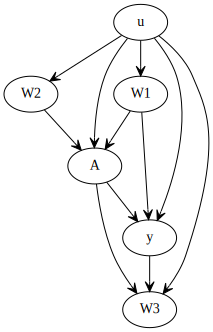

In [2]:
import graphviz as gr

g = gr.Digraph(edge_attr={'arrowhead':'vee', 'arrowsize':'1'})
g.edge("u", "W2")
g.edge("u", "W1")
g.edge("u", "y")
g.edge("u", "W3")
g.edge("u", "A")

g.edge("W2", "A")

g.edge("W1", "A")
g.edge("W1", "y")

g.edge("A", "W3")
g.edge("A", "y")

g.edge("y", "W3")

g

Now, consider the a specific data generating process, where each of the exogenous nodes $U_{X_i}$ is drawn independently from the following distributions:
		
\begin{align*}
        U_{W_1} \sim Uniform (0,1) \\
        U_{W_2} \sim Normal (\mu=1, \sigma^2 = 2^2) \\
        U_{W_A} \sim Uniform (0,1) \\
        U_{Y} \sim Uniform (0,1) \\
        U_{W_3} \sim Uniform (0,1) \\
\end{align*}
    
Given the $U$’s, the endogenous variables are deterministically generated as:
    
\begin{align*}
        W_1 = \mathbb{I}[U_{W_1} < 0.45] \\
        w_2 = 0.75 U_{W_2} \\
        A = \mathbb{I}[U_A < logit^{-1}(-1 + 2.6W_1+0.9W_2)] \\
        Y = \mathbb{I}[U_Y < logit^{-1}(-2 + A+0.7W_1)] \\
        W_3 = \mathbb{I}[U_{W_3} < logit^{-1}(-1 + 1.3A+2.9Y)] \\
\end{align*}		
where $\mathbb{I}$ is the indicator function equal to 1 if the statement in the brackets is true.
    
Recall that the \textit{logit} function are defined as:
    
\begin{equation*}
        logit(x) = \log (\frac{x}{1-x}) \qquad logit^{-1} (x) = \frac{1}{1+e^{-x}}
\end{equation*}

<br>

- **Translate the DAG into the corresponding structural causal model (SCM).**
- The causal question is to evaluate the effect of forming an alliance on the probability of surviving through the first 24 hours. **Specify and calculate the ATE for the given causal question**. 
- *[Hint]* The distribution of $\mathbb{I}[U < Th]$, where $U \sim Uniform$ and $Th$ is a threshold, is a Bernoulli distribution with probability $Th$.  
- **{Write a short discussion about the meaning of this ATE for the given story.**

## Exercise 2: Structure learning

Use a library of your choice (for example [bnlearn](https://erdogant.github.io/bnlearn/pages/html/index.html), [cdt](https://fentechsolutions.github.io/CausalDiscoveryToolbox/html/index.html) or [pgmpy](https://pgmpy.org/) to retrieve the causal graph from the following dataset. 
		

- **Your are encouraged to use and compare different methods for structure learning.** 
- **Use some explanations to support your results. Do the results make sense based on your knowledge?**

### Car dataset

This dataset was taken from the *StatLib* library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.
It is a collection of 392 cars, each with some following "attributes".	
The dataset has been acquired from (https://archive.ics.uci.edu/ml/datasets/auto+mpg). You can import directly using pandas as:

In [ ]:
import pandas as pd
data_mpg = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original')

You can remove some entries like "model year", "origin", "car name". The remaining columns are as follows:

**mpg** (miles-per-gallon) | **cylinders** | **displacement** | **horsepower** | **weight** | **acceleration**